In [27]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df1 = pd.DataFrame(np.arange(9).reshape((3,3)), 
                   columns=list('bcd'), 
                   index=['OHIO', 'TEXAS', 'COLORADO'])
df2 = pd.DataFrame(np.arange(12).reshape((4,3)), 
                   columns=list('bde'), 
                   index=['UTAH', 'OHIO', 'TEXAS', 'COLORADO'])


In [6]:
df1 + df2 # NO REFELLING

,b,c,d,e
COLORADO,15.0,NaN,18.0,NaN
OHIO,3.0,NaN,6.0,NaN
TEXAS,9.0,NaN,12.0,NaN
UTAH,NaN,NaN,NaN,NaN


In [7]:
df1.add(df2, fill_value=0) # when missing one value adds 0, 
#                           where there is no value in both dataframes it fills with NAN

,b,c,d,e
COLORADO,15.0,7.0,18.0,11.0
OHIO,3.0,1.0,6.0,5.0
TEXAS,9.0,4.0,12.0,8.0
UTAH,0.0,NaN,1.0,2.0


In [10]:
np.random.randn(3,3)

array([[-1.02282915, -0.84308377,  1.45906788],
       [ 0.21189523, -0.70686693,  1.34439911],
       [-0.46777754, -1.76605823,  1.04221541]])

In [12]:
frame = pd.DataFrame(np.random.randn(3,3), 
                     columns=list('abc'),
                     index=['Utah', 'Texas', 'Colorado'])
frame

,a,b,c
Utah,0.490645,-0.473001,0.455414
Texas,0.801646,0.351587,0.334848
Colorado,-0.142198,0.151365,1.615407


In [13]:
frame.abs() # using pandas functions

,a,b,c
Utah,0.490645,0.473001,0.455414
Texas,0.801646,0.351587,0.334848
Colorado,0.142198,0.151365,1.615407


In [14]:
np.abs(frame) # using numpy array util functions

,a,b,c
Utah,0.490645,0.473001,0.455414
Texas,0.801646,0.351587,0.334848
Colorado,0.142198,0.151365,1.615407


In [15]:
# Applying functions along an axis with pandas apply()

f = lambda x: x.max() - x.min()

frame.apply(f)

a    0.943844
b    0.824588
c    1.280560
dtype: float64

In [17]:
# applying on different axis
frame.apply(f, axis=1)

Utah        0.963646
Texas       0.466798
Colorado    1.757606
dtype: float64

In [19]:
# Formatting strings
format_ = lambda x: '%.2f' % x  # old way
format_ = lambda x: f'{x:.2f}' # new way
format_(21.2232)

'21.22'

In [23]:
# Applying python functions to DataFrames elementwise
frame.applymap(format_)

,a,b,c
Utah,0.49,-0.47,0.46
Texas,0.80,0.35,0.33
Colorado,-0.14,0.15,1.62


In [24]:
# Applying python functions to Series elementwise
frame['c'].map(format_)

Utah        0.46
Texas       0.33
Colorado    1.62
Name: c, dtype: object

In [25]:
frame.rank()

,a,b,c
Utah,2.0,1.0,2.0
Texas,3.0,3.0,1.0
Colorado,1.0,2.0,3.0


In [26]:
frame

,a,b,c
Utah,0.490645,-0.473001,0.455414
Texas,0.801646,0.351587,0.334848
Colorado,-0.142198,0.151365,1.615407


In [29]:
# SEMINAR EXERCISES
# EXERCISE 1   
ser1 = pd.Series([1, "John", 3.5, "Hey"])

In [30]:
print(ser1)

0       1
1    John
2     3.5
3     Hey
dtype: object


In [31]:
ser1.values

array([1, 'John', 3.5, 'Hey'], dtype=object)

In [32]:
ser1.index

RangeIndex(start=0, stop=4, step=1)

In [34]:
ser1[1]

'John'

In [35]:
scores = {
    "Jane":90,
    "Bill":80,
    "Elon":85,
    "Tom":75,
    "Tim":95
}

In [37]:
scores_ser = pd.Series(scores)

In [38]:
scores_ser["Tim"]

95

In [40]:
scores_ser[scores_ser>85]

Jane    90
Tim     95
dtype: int64

In [41]:
"Tom" in scores_ser

True

In [42]:
"Cain" in scores_ser

False

In [43]:
scores_ser/10

Jane    9.0
Bill    8.0
Elon    8.5
Tom     7.5
Tim     9.5
dtype: float64

In [44]:
scores_ser*2

Jane    180
Bill    160
Elon    170
Tom     150
Tim     190
dtype: int64

In [46]:
scores_ser[scores_ser.isnull()]

Series([], dtype: int64)

In [55]:
scores = {
    "Jane":90,
    "Bill":80,
    "Elon":85,
    "Tom":75,
    "Tim":95,
    "Tina": None
}

In [56]:
ser2 = pd.Series(scores)

In [57]:
ser2

Jane    90.0
Bill    80.0
Elon    85.0
Tom     75.0
Tim     95.0
Tina     NaN
dtype: float64

In [58]:
ser2[ser2.isna()]

Tina   NaN
dtype: float64

In [59]:
# EXERCISE 2

In [60]:
games = pd.read_csv("vgsalesGlobale.csv")

In [61]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Predicted_Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,39.00
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,31.37


In [64]:
# If series     -> returns number of rows
# If dataframe  -> returns number of rows * columns (elements in the dataframe)
games.size

45588

In [65]:
# Shape -> (rows, columns)
games.shape

(3799, 12)

In [63]:
# This will return the number of rows
len(games)

3799

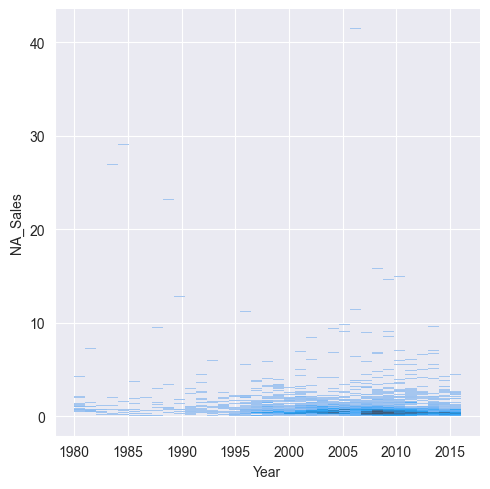

In [75]:
# Ploting a histogram
sns.set_style('darkgrid')
sns.displot(x=games['Year'], y=games['NA_Sales'], kind='hist')
# sns.despine()

In [95]:
NA_sales_year = games[['Year', 'NA_Sales']].groupby('Year').sum()
NA_sales_year.shape

(37, 1)

Text(0, 0.5, 'Sales')

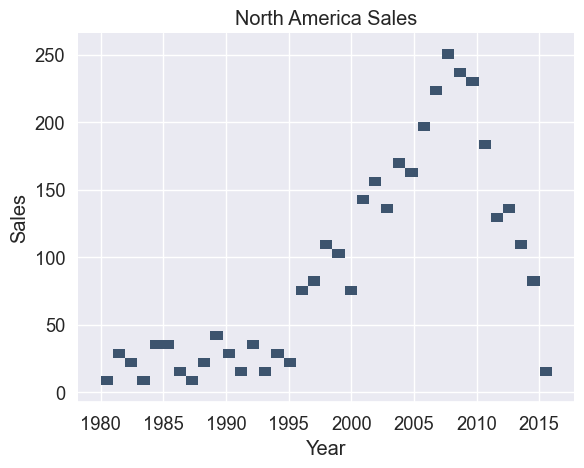

In [99]:
sns.histplot(x=NA_sales_year.index, y=NA_sales_year['NA_Sales'], bins=37)
sns.set_context('notebook', font_scale=1.2)
sns.despine(left=True)
plt.title("North America Sales")
plt.xlabel("Year")
plt.ylabel("Sales")

In [100]:
# Exercise 3
data={"name":["Bill", "Tom", "Tim", "John", "Alex", "Vanessa", "Kate"],
"score":[90,80,85,75,95,60,65],
"sport":["Wrestling", "Football", "Skiing", "Swimming", "Tennis",
"Karete", "Surfing"],
"sex":["M","M","M","M","F","F","F"]}


In [101]:
students_df = pd.DataFrame(data)

In [104]:
students_df

,name,score,sport,sex
0,Bill,90,Wrestling,M
1,Tom,80,Football,M
2,Tim,85,Skiing,M
3,John,75,Swimming,M
4,Alex,95,Tennis,F
5,Vanessa,60,Karete,F
6,Kate,65,Surfing,F
